In [1]:
# This code simply loads traces and displays them in a spectrogram and in a plot
# It does not contain any training functions or parameters
# It was created to increase the readability of the main code and to enable the display of the loaded traces (Duh :P)


# This code contains code adapted from Nils Wisiol, sntrup4591761 and ANSSI-FR/ASCAD
# All snippets are marked accordingly as such
# from tqdm import tnrange

# General modules
import sys
from pathlib import Path


# Load data modules
from numpy import empty, zeros, uint16
from numpy.random import RandomState
import chipwhisperer as cw
import numpy as np
## Load data modules for DPA contest
# This library is from another GitHub library: https://github.com/yetifrisstlama/readTrc
from readTrc import Trc

# Plot traces
from scipy import signal, fftpack
import matplotlib.pyplot as plt
## Plot zoomed in
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# ASCAD: Adapted by Mahmoud Gharra to fit the NTRU Prime input


# returns traces and labels, as well as some important global meta_data

def load_database(my_database):
    # load traces
    print("++ Loading projects")
    project = cw.open_project(my_database)
    global KEY_LENGTH, TEXT_LENGTH, SAMPLE_HIGH, TRAINING_SLICE, TEST_NUM, TEST_SLICE

    # Organize trace data for MLP
    print("++ Organizing traces")
    KEY_LENGTH = TEXT_LENGTH = len(project.keys[0]) * 8 # TODO: reset
#     KEY_LENGTH = TEXT_LENGTH = len(project.keys[0]) # TODO: reset
    print("KEY_LENGTH: {}".format(KEY_LENGTH))
    print("project.keys[0][0]: {}".format(project.keys[0][0]))
    print("np.asarray(bytearray(project.keys[0]))", np.asarray(bytearray(project.keys[0])))

    # SET DATA RELATED GLOBALS REQUIRED FOR EXTRACTION
    sample_low = 0
    SAMPLE_HIGH = project.trace_manager().num_points() # length of singular trace
    sample_slice = slice(sample_low, SAMPLE_HIGH)
    sample_num = len(project.traces) # number of traces
#     print("sample num: ", sample_num)
    
    # organize traces in X matrix
    X = empty(shape=(sample_num, SAMPLE_HIGH - sample_low))

    # organize the operands in Y matrix
    count = 0
    
    y = empty(shape=(sample_num, KEY_LENGTH))
    for i in range(sample_num):
        # reproduce values
        
        # The next three lines were for debugging purposes. I'm sorry for doing printf debugging :p
#         print("key of sample {}: {}".format(i, project.keys[i]))
#         print("data type of key of sample {}: {}".format(i, type(project.keys[i])))
#         print("ISO-8859-1 encoding: {}".format(project.keys[i].decode("ISO-8859-1")))

        if (len(np.asarray(bytearray(project.keys[i])))) is not (int(KEY_LENGTH/8)):
            count += 1
#             print("Number of problematic traces raised to: {}".format(count))
#             print("actual key len: {}, expected length: {}".format(len(np.asarray(bytearray(project.keys[i]))), int(KEY_LENGTH/8)))
            continue
            
#         print("y[{}]: {}".format(i-count, np.asarray(bytearray(project.keys[i]))))
#         print("np.asarray(bytearray(project.keys[i])): {}".format(len(np.asarray(bytearray(project.keys[i])))))
        y[i-count] = np.asarray([int(char) for char in ''.join(['{0:08b}'.format(ff) for ff in np.asarray(bytearray(project.keys[0]))])])
#         y[i-count] = np.asarray(bytearray(project.keys[i]))
        X[i-count] = project.waves[i][sample_slice]

#     remove last {count} rows for having wrong KEY-Dimesions
    if i is not 0:
        y = y[0:-count]
        X = X[0:-count]

#     # transform generated key numbers to labels
#     y = np.array((y.T[1::2].T*(2**8)) + y.T[::2].T, dtype=np.int16)

    # the next 4 lines aren't needed because the labels for the sampler are ints starting at 0
#     unique = np.unique(y)
#     class_dic = dict([[unique[i], i] for i in range(len(unique))])
#     y_labelled = np.vectorize(class_dic.get)(y)
#     return X, y_labelled


    # SET DATA RELATED GLOBALS before returning (POST EXTRACTION)
    sample_low = 0
    SAMPLE_HIGH = project.trace_manager().num_points() # length of singular trace
    sample_slice = slice(sample_low, SAMPLE_HIGH)
    sample_num = len(project.traces) - count # number of traces
    
    training_num = sample_num - tst_len
    TRAINING_SLICE = slice(0, training_num)

    TEST_NUM = sample_num - training_num
    TEST_SLICE = slice(training_num, TEST_NUM + training_num)
    assert TEST_NUM + training_num <= sample_num
    assert training_num > 3*TEST_NUM


    return X, y


def read_parameters_from_file(param_filename):
    #read parameters for the train_model and load_traces functions
    #TODO: sanity checks on parameters
    param_file = open(param_filename,"r")

    #TODO: replace eval() by ast.linear_eval()
    my_parameters= eval(param_file.read())

    my_database = my_parameters["database"]
    my_database_title = my_parameters["database_title"]
    return my_database_title, my_database



# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
def four_tr(traces, tmp_i, f_s):
    _Four = fftpack.fft(traces[tmp_i])
    _freqs = fftpack.fftfreq(len(traces[tmp_i])) * f_s
    
    return _Four, _freqs


In [ ]:
# ASCAD: Adapted by Mahmoud Gharra to fit the NTRU Prime input


# returns traces and labels, as well as some important global meta_data

def load_database_DPA(my_database_traces, my_database_labels):
    # load traces
    print("++ Loading projects")

    global KEY_LENGTH, TEXT_LENGTH, SAMPLE_HIGH, TRAINING_SLICE, TEST_NUM, TEST_SLICE

    # Organize trace data for MLP
    print("++ Organizing traces")
    KEY_LENGTH = TEXT_LENGTH = 1
    
    print("KEY_LENGTH: {}".format(KEY_LENGTH))

#     # SET DATA RELATED GLOBALS REQUIRED FOR EXTRACTION
#     sample_low = 0
#     SAMPLE_HIGH = project.trace_manager().num_points() # length of singular trace
#     sample_slice = slice(sample_low, SAMPLE_HIGH)
#     sample_num = len(project.traces) # number of traces
# #     print("sample num: ", sample_num)
    
#     # organize traces in X matrix
#     X = empty(shape=(sample_num, SAMPLE_HIGH - sample_low))

#     # organize the operands in Y matrix
#     count = 0
    
#     y = empty(shape=(sample_num, KEY_LENGTH))
#     for i in range(sample_num):
#         # reproduce values
        
#         # The next three lines were for debugging purposes. I'm sorry for doing printf debugging :p
# #         print("key of sample {}: {}".format(i, project.keys[i]))
# #         print("data type of key of sample {}: {}".format(i, type(project.keys[i])))
# #         print("ISO-8859-1 encoding: {}".format(project.keys[i].decode("ISO-8859-1")))

#         if (len(np.asarray(bytearray(project.keys[i])))) is not (int(KEY_LENGTH/8)):
#             count += 1
# #             print("Number of problematic traces raised to: {}".format(count))
# #             print("actual key len: {}, expected length: {}".format(len(np.asarray(bytearray(project.keys[i]))), int(KEY_LENGTH/8)))
#             continue
            
# #         print("y[{}]: {}".format(i-count, np.asarray(bytearray(project.keys[i]))))
# #         print("np.asarray(bytearray(project.keys[i])): {}".format(len(np.asarray(bytearray(project.keys[i])))))
#         y[i-count] = np.asarray([int(char) for char in ''.join(['{0:08b}'.format(ff) for ff in np.asarray(bytearray(project.keys[0]))])])
# #         y[i-count] = np.asarray(bytearray(project.keys[i]))
#         X[i-count] = project.waves[i][sample_slice]

# #     remove last {count} rows for having wrong KEY-Dimesions
#     if i is not 0:
#         y = y[0:-count]
#         X = X[0:-count]

# #     # transform generated key numbers to labels
# #     y = np.array((y.T[1::2].T*(2**8)) + y.T[::2].T, dtype=np.int16)

#     # the next 4 lines aren't needed because the labels for the sampler are ints starting at 0
# #     unique = np.unique(y)
# #     class_dic = dict([[unique[i], i] for i in range(len(unique))])
# #     y_labelled = np.vectorize(class_dic.get)(y)
# #     return X, y_labelled


#     # SET DATA RELATED GLOBALS before returning (POST EXTRACTION)
#     sample_low = 0
#     SAMPLE_HIGH = project.trace_manager().num_points() # length of singular trace
#     sample_slice = slice(sample_low, SAMPLE_HIGH)
#     sample_num = len(project.traces) - count # number of traces
    
#     training_num = sample_num - tst_len
#     TRAINING_SLICE = slice(0, training_num)

#     TEST_NUM = sample_num - training_num
#     TEST_SLICE = slice(training_num, TEST_NUM + training_num)
#     assert TEST_NUM + training_num <= sample_num
#     assert training_num > 3*TEST_NUM


#     return X, y


In [3]:
def sample_traces(unlab_traces):
    
    t = np.arange(unlab_traces.shape[1])
    myTraces = np.array(unlab_traces)

    rand_ind = np.zeros(tot)
    for i in range(tot):
        rand_ind[i] = np.random.randint(myTraces.shape[0])

    # plot traces
    print("++ plot traces")
    fig1, axs1 = plt.subplots(tot)
    fig1.suptitle(DB_title + ": " + str(rand_ind))
    for i in range(tot):
        axs1[i].plot(t, myTraces[int(rand_ind[i])])

    # zoomed in traces plot    
#     print("++ plot zoomed in traces")
#     fig5, axs5 = plt.subplots(2)
#     fig5.suptitle(DB_title + ": " + str(rand_ind))
    
#     for m in range(2):
#         def f(m):
#             axs5[m].plot(t, myTraces[int(rand_ind[m])])
#             axs5[m].set_xlim(m, m+1000)
#         interactive(f, m=(0, 900.0))
        
    
    
    # https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html    
    # frequency plot
    print("++ plot frequencies")
    fig2, axs2 = plt.subplots(tot)
    fig2.suptitle(DB_title + " Freqs: " + str(rand_ind))
    for j in range(tot):
        Four, freqs = four_tr(myTraces, int(rand_ind[j]), f_s)
    #     fig, ax = plt.subplots()
        axs2[-j].stem(freqs, np.abs(Four), use_line_collection=True, linefmt='-', markerfmt=" ")
        
    #     axs2[j].set_xlim(-f_s / 2, f_s / 2)
    #     axs2[j].set_ylim(-5, 110)

    # zoomed in frequency plot
#     print("++  plot frequencies (zoomed in)")
#     fig3, axs3 = plt.subplots(tot)
#     fig3.suptitle(DB_title + " Freqs: " + str(rand_ind))
#     for k in range(tot):
#         Four, freqs = four_tr(myTraces, int(rand_ind[k]), f_s)
#         Four[0] = 0
#         axs3[k].stem(freqs, np.abs(Four), use_line_collection=True, linefmt='-', markerfmt=" ")
#         axs3[k].set_xlim(-10, 10)
#         axs3[k].set_ylim(-1, 10)

    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
#     print("++ plot spectrogram")
#     fig4, axs4 = plt.subplots(tot)
#     fig4.suptitle(DB_title + " sprectrogram: " + str(rand_ind))
#     fig4.axes[-1].set_xlabel('time (sec)')
#     fig4.axes[int(tot/2)].set_ylabel('frequency')

#     for l in range(tot):
#         f, t, Sxx = signal.spectrogram(myTraces[int(rand_ind[l])], f_s)
#         axs4[l].pcolormesh(t, f, Sxx)
# #         axs4[l].set_xlim(-1, 20)


+ Commense loading data
++ Loading projects
++ Organizing traces
KEY_LENGTH: 256
project.keys[0][0]: 48
np.asarray(bytearray(project.keys[0])) [ 48 113  40  75 166 213 183  67 239 120 143 113 135 156 208  41 134  97
   5  86  20   3  35 169  33  98 249  13 208 208 118 207]
++ Data dimestions are:  (4977, 16000)
+ sample 3 traces
++ plot traces
++ plot frequencies


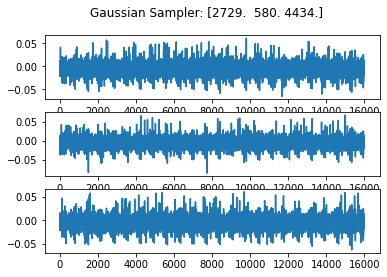

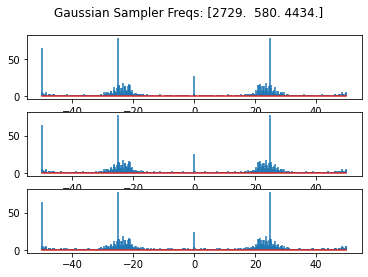

In [4]:
#ASCAD: Adapted by Mahmoud Gharra

# NOTE: code could take another database if it has the same format as the one provided.
# NOTE: you need to make a local directory with the name of your chosen training_model

###################
###################
# Hyper parameters:
###################

tot = 3 # total number of random samples that you'd like to display
f_s = 100 # frequency of data in Hz --- I can't seem to find this value in proj

tst_len = 30 # length of testing set

###################
###################

# if __name__ == "__main__":

if len(sys.argv)!=2:
    #default parameters values
#     my_database = "PRE_MAY_06/projects/operand_scanning_32"
#     DB_title = "operand_scanning_32"

#     my_database = "schoolbook32/schoolbook32"        
#     my_database = "../2020_APR_23/polymul32/projects/operand_scanning_32"
#     DB_title = "schoolbook32"

    my_database = "../GSprojectNils/projects/GStraces"
#     my_database = "../2020_APR_23/polymul32/projects/operand_scanning_32"
    DB_title = "Gaussian Sampler"

    # TRAINING MODEL IS THE FILE, IN WHICH THE DATA SHOULD BE SAVED
else:
    #get parameters from user input
    DB_title, database = read_parameters_from_file(sys.argv[1])

# loads traces
print("+ Commense loading data")
X, y = load_database(my_database)
print("++ Data dimestions are: ", np.array(X).shape)

print("+ sample {0} traces".format(tot))
if tot != 0:
    sample_traces(X)

In [5]:
# It looks like we have PowerLine intereference:
# This should fix it but I can't download matlab...
# I need conda for it, which I also don't have
# -- https://github.com/mrezak/removePLI
# import matlab.engine
# eng = matlab.engine.start_matlab()

In [6]:
# High and low pass filtering https://mne.tools/0.13/auto_tutorials/plot_artifacts_correction_filtering.html

In [7]:
project = cw.open_project(my_database)

print('location (project.location): ', project.location)
print()

print('trace length (project.waves[0].size): ', project.waves[0].size)
print()

print('number of traces (len(project.traces)): ', len(project.traces))
print()
print()

# Iterable for working with only the text in.
# Each item in the iterable is a byte array.
# Supports iterating, indexing, and slicing:
print("project.textins[0].size", project.textins[0].size)
print("project.textins[0]", project.textins[0])
print("project.textins (an iterable of length 64): ", project.textins)
print()
print("len(project.textins[0].tobytes())", len(project.textins[0].tobytes()))
print()
print()

# Iterable for working with only the text out.
# Each item in the iterable is a byte array.
# Supports iterating, indexing, and slicing:
print("project.textouts[0] (always False ... What is it?): ", project.textouts[0])
print()
print()

# An output for all 64 keys with . 
print("num. of keys (project.keys[0].size): ", project.keys[0].size)
print("max index of labelled traces (project.keys.max): ", project.keys.max)
print("number of classes")
print()

# keys_set = set(project.keys[0])


# the following 4 lines are for the Gaussian sampler
keys_set = set([])
for i in range(len(project.keys[0])):
    keys_set = keys_set.union(set(project.keys[i]))


print("keys_set = set(project.keys[0]) -- (not well implemented... Assumes all key labels are in first trace):", keys_set)
print("number of classes (based on keys_set) -- (len(keyset)): ", len(keys_set))
print()
print()

print("file name (project.get_filename()): ", project.get_filename())
print()

print("length of singular traces (project.trace_manager().num_points()): ", project.trace_manager().num_points())
print("number total of traces (project.trace_manager().num_traces()): ", project.trace_manager().num_traces())
print()



location (project.location):  /home/gharra/GSprojectNils/projects

trace length (project.waves[0].size):  16000

number of traces (len(project.traces)):  5000


project.textins[0].size 1
project.textins[0] b':\x7f\xe4O\xa4Y\xfe\x0c\xcb\x8f\x13\xfb;G\x81\xaf\x06\x88\xfah\x04?\xf9%.\xb5\x0f\xc3\x0bB\xdf\x82'
project.textins (an iterable of length 64):  <chipwhisperer.common.api.ProjectFormat.IndividualIterable object at 0x7fff3fbc8cf8>

len(project.textins[0].tobytes()) 32


project.textouts[0] (always False ... What is it?):  False


num. of keys (project.keys[0].size):  1
max index of labelled traces (project.keys.max):  4999
number of classes

keys_set = set(project.keys[0]) -- (not well implemented... Assumes all key labels are in first trace): {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 

In [8]:
# # https://stackoverflow.com/questions/50590175/how-to-create-multiple-plots-with-scrollable-x-axis-with-a-single-slider

# %matplotlib inline
# from ipywidgets import interactive
# import matplotlib.pyplot as plt
# import numpy as np

# def f(m):
#     plt.figure(2)
#     x = np.linspace(0, 1000, num=2000)
#     plt.plot(x,x)
#     #plt.plot(x, m * x)
#     plt.xlim(m, m+100)
#     plt.show()

# interactive(f, m=(0, 900.0))


# def f2(m):
#     t = np.arange(X.shape[1])
#     myTraces = np.array(X)

# #     plt.plot(x,x)
#     plt.plot(t, myTraces[243])
#     plt.xlim(m, m+500)
#     plt.show()

# interactive(f2, m=(0, 4500.0))



# def f3(m):
#     t = np.arange(X.shape[1])
#     myTraces = np.array(X)

# #     plt.plot(x,x)
#     plt.plot(t, myTraces[563])
#     plt.xlim(m, m+500)
#     plt.show()

# interactive(f3, m=(0, 4500.0))



# def f4(m):
#     t = np.arange(X.shape[1])
#     myTraces = np.array(X)

# #     plt.plot(x,x)
#     plt.plot(t, myTraces[1000])
#     plt.xlim(m, m+500)
#     plt.show()

# interactive(f4, m=(0, 4500.0))

In [9]:
# X.shape

In [10]:
# y.shape

In [11]:
# y[1]

In [12]:

# # returns traces and labels, as well as some important global meta_data

# def load_database2(my_database):
#     # load traces
#     print("++ Loading projects")
#     project = cw.open_project(my_database)
#     global KEY_LENGTH, TEXT_LENGTH, SAMPLE_HIGH, TRAINING_SLICE, TEST_NUM, TEST_SLICE

#     # Organize trace data for MLP
#     print("++ Organizing traces")
#     KEY_LENGTH = TEXT_LENGTH = project.keys[0].size

#     sample_low = 0
#     SAMPLE_HIGH = project.trace_manager().num_points() # length of singular trace
#     sample_slice = slice(sample_low, SAMPLE_HIGH)
#     sample_num = len(project.traces) # number of traces
# #     print("sample num: ", sample_num)
#     training_num = sample_num - tst_len
#     TRAINING_SLICE = slice(0, training_num)

#     TEST_NUM = sample_num - training_num
#     TEST_SLICE = slice(training_num, TEST_NUM + training_num)
#     assert TEST_NUM + training_num <= sample_num
#     assert training_num > 3*TEST_NUM

#     # organize traces in X matrix
#     X = empty(shape=(sample_num, SAMPLE_HIGH - sample_low))
#     for i in range(sample_num):
#         X[i] = project.waves[i][sample_slice]

#     # organize the operands in Y matrix
#     y = empty(shape=(sample_num, KEY_LENGTH))
#     for i in range(sample_num):
#         # reproduce values
#         y[i] = project.keys[i]
# #         text_num = text_gen(seed=i)[:TEXT_LENGTH]
# #         key_num = key_gen(seed=i)[:KEY_LENGTH]
# #         y[i][:] = key_num[:]
#         #y[i][y[i] > 2**15] -= 2**16

    
#     # transform generated key numbers to labels
#     unique = np.unique(y)
#     class_dic = dict([[unique[i], i] for i in range(len(unique))])
#     y_labelled = np.vectorize(class_dic.get)(y)

#     y_orig = y
#     return X, y_labelled, y_orig



In [13]:
# X_new, y_l, y_or = load_database2(my_database)

In [14]:
# X_new.shape

In [15]:
# y_l.shape

In [16]:
# print(y_or.shape)
# print(y_or[0].shape)
# print(y_or[0])

# print()

# print(y_or[1].shape)
# print(y_or[1])

# print()

# print(np.array((y_or[0]*(2**8)) + y_or[1], dtype=int))

In [17]:
# print(y_or[0])
# # print(y_or[0][0::2])
# # print(y_or[0][::2][8]) # even indices
# # print(y_or[0][1::2][8]) # odd indices
# print(np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16).shape)
# print(np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16))

In [18]:
# from collections import Counter
# print(np.sum(np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16) == -1))
# np.array((y_or.T[1::2].T*(2**8)) + y_or.T[::2].T, dtype=np.int16).shape


In [19]:
# 15000 * 32

In [20]:
# 90180 / 480000

In [21]:
my_database = "../GSproject/projects/GStraces"
project = cw.open_project(my_database)

print("total number of traces: {}".format(project.keys.max + 1))

# see if all keys have correct length (32)
count = 0
myDict = dict()
for i in range(project.keys.max):
    if (len(np.asarray(bytearray(project.keys[i])))) is not 32:
        myDict[i]= len(np.asarray(bytearray(project.keys[i])))
        count += 1

print("number of traces not containing 32 instances of our 8-bit key: {}".format(count)) # should be 0
print("indices of problematic traces and their length (ind: length): {}".format(myDict)) # should be empty


# quick sanity check for all key instances
mySet = set([])
for i in range(project.keys.max):
    mySet = mySet.union(np.unique(np.asarray(bytearray(project.keys[i]))))

print("appearing key instances (256 is correct): {}".format(len(mySet)))

total number of traces: 200
number of traces not containing 32 instances of our 8-bit key: 2
indices of problematic traces and their length (ind: length): {35: 31, 121: 31}
appearing key instances (256 is correct): 256


In [32]:
my_database = "../GSproject/projects/GStraces"
project = cw.open_project(my_database)

print("total number of traces: {}".format(project.keys.max + 1))

# see if all keys have correct length (32)
count = 0
myDict = dict()
KEY_LENGTH = 32 * 8
sample_num = len(project.traces)

y = empty(shape=(sample_num, KEY_LENGTH * 8))

# np.asarray(bytearray(project.keys[0]))

# ''.join(['{0:08b}'.format(ff) for ff in np.asarray(bytearray(project.keys[0]))])

for i in range(50):
    print(np.asarray([int(char) for char in ''.join(['{0:08b}'.format(ff) for ff in np.asarray(bytearray(project.keys[i]))])])[0:30])



total number of traces: 200
[1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0]
[1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0]
[1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0]
[1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0]
[1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0]
[0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1]
[1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1]
[0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
[1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0]
[1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0]
[0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1]
[1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0]
[0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1]
[1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1]
[1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1]
[0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0

In [23]:
# import codecs
# encodings = ['utf-8', 'windows-1250', 'windows-1252', 'utf-16', "ascii", 'cp037']# ...etc]
# for e in encodings:
#     try:
#         fh = project.keys[0].decode(e)
#     except UnicodeDecodeError:
#         print('got unicode error with %s , trying different encoding' % e)
#     else:
#         print('opening the file with encoding:  %s ' % e)
#         print('it looks like this: {}'.format(fh))
        

In [24]:
# bytearray(b'0q(K\xa6\xd5\xb7C\xefx\x8fq\x87\x9c\xd0)\x86a\x05V\x14\x03#\xa9!b\xf9\r\xd0\xd0v\xcf')

In [25]:
# np.asarray(bytearray(b'0q(K\xa6\xd5\xb7C\xefx\x8fq\x87\x9c\xd0)\x86a\x05V\x14\x03#\xa9!b\xf9\r\xd0\xd0v\xcf'))

In [26]:
# np.asarray(bytearray(b'0q(K\xa6\xd5\xb7C\xefx\x8fq\x87\x9c\xd0)\x86a\x05V\x14\x03#\xa9!b\xf9\r\xd0\xd0v\xcf')).size

In [27]:


# a = np.array([[1, 2, 3, 4],
# [5, 6, 7, 8],
# [9, 10, 11, 12],
# [13, 14, 15, 16]])

# count = 0
# print("a:\n{}".format(a))
# for i in range(1, 5):
#     print("a[0:-{}]:\n{}".format(i, a[0:-i]))

In [75]:
# advs = np.load("./training_GAUSS_bitwise_mlp_batch100_epochs2_MAXATT1_lr1e-4_valid1e-1/tst_acc.npy", allow_pickle=True)
advs = np.load("./training_GAUSS_bitwise_cnn_batch100_epochs5_MAXATT1_lr1e-4_valid1e-1/tst_acc.npy", allow_pickle=True)

In [76]:
set(advs.tolist().values())

{0.0,
 0.002,
 0.06,
 0.076,
 0.114,
 0.132,
 0.224,
 0.28,
 0.426,
 0.53,
 0.686,
 0.872,
 0.914,
 0.958,
 0.97,
 0.98,
 0.996,
 0.998,
 1.0}

In [77]:
advs.tolist().values()

dict_values([1.0, 0.97, 0.0, 0.224, 0.0, 0.958, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.002, 0.002, 0.0, 0.998, 1.0, 1.0, 0.53, 0.0, 0.0, 1.0, 0.426, 0.0, 0.914, 1.0, 0.686, 0.996, 0.0, 0.28, 0.06, 1.0, 0.98, 0.114, 0.0, 0.132, 0.076, 0.998, 0.872, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,